In [1]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
!git clone https://github.com/CodingWithTim/MMLU-stats.git
%cd MMLU-stats/
!git pull

fatal: destination path 'MMLU-stats' already exists and is not an empty directory.
/content/drive/MyDrive/MMLU-stats
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 62 (delta 1), reused 62 (delta 1), pack-reused 0
Unpacking objects: 100% (62/62), 1.93 MiB | 1.89 MiB/s, done.
From https://github.com/CodingWithTim/MMLU-stats
   3cf316c..357da63  main       -> origin/main
Updating 3cf316c..357da63
Fast-forward
 data/mmlu/test/abstract_algebra_test.csv           |  100 ++
 data/mmlu/test/anatomy_test.csv                    |  135 ++
 data/mmlu/test/astronomy_test.csv                  |  152 ++
 data/mmlu/test/business_ethics_test.csv            |  100 ++
 data/mmlu/test/clinical_knowledge_test.csv         |  265 +++
 data/mmlu/test/college_biology_test.csv            |  147 ++
 data/mmlu/test/college_chemistry_test.csv          |  116 ++
 data/mmlu/test/college_computer_science_test.csv   | 

In [9]:
import pandas
import os
import matplotlib.pyplot as plt

from itertools import combinations
from matplotlib_venn import venn3

In [13]:
subjects = sorted(
    [
        f.split("_test.csv")[0]
        for f in os.listdir(os.path.join("data", "mmlu", "test"))
        if "_test.csv" in f
    ]
)

In [15]:
models = ["llama13b", "vicuna7b", "vicuna13b"]
model_dfs = {}

for subject in subjects:
  model_df = pandas.read_csv(os.path.join("combined", f'{subject}.csv'))
  model_dfs[subject] = model_df

In [79]:
def venn_diagram(subject):
  print(subject)

  answers = []

  for model in models:
    model_answer = model_dfs[subject][f'{model} Answer'].values
    correct_answer = model_answer == model_dfs[subject]['Correct Answer']

    correct_indexes = [i for i, x in enumerate(correct_answer) if x]
    incorrect_indexes = [i for i, x in enumerate(correct_answer) if not x]

    answers.append(set(correct_indexes))

  venn3(
      subsets=answers,
      set_labels=models,
  )


def venn_diagram_all():
  print("All subjects")

  answers = []

  for model in models:
    for subject in subjects:
      model_answer = model_dfs[subject][f'{model} Answer'].values
      correct_answer = model_answer == model_dfs[subject]['Correct Answer']

      correct_indexes = [subject + str(i) for i, x in enumerate(correct_answer) if x]
      incorrect_indexes = [subject + str(i) for i, x in enumerate(correct_answer) if not x]

    answers.append(set(correct_indexes))

  venn3(
      subsets=answers,
      set_labels=models,
  )


Use func venn_diagram to create venn diagram for one subject.

abstract_algebra


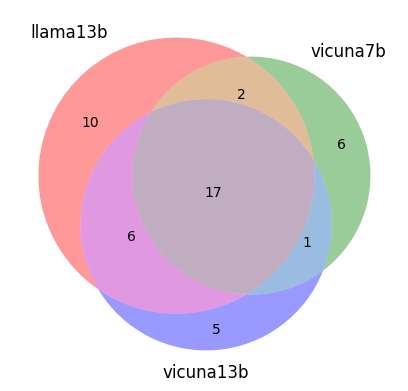

In [66]:
venn_diagram(subjects[0])

Use func venn_diagram_all() to create venn diagram across all subjects.

All subjects


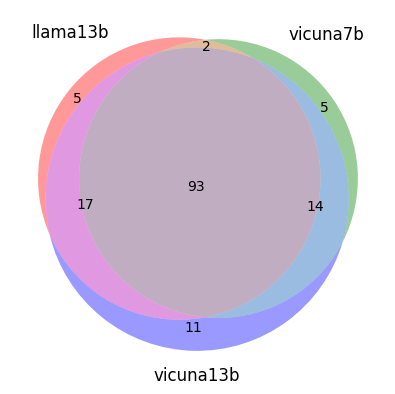

In [80]:
venn_diagram_all()

List of all subjects and their indexes.

In [82]:
for i, subject in enumerate(subjects):
  print(str(i) + ": " + subject)

0: abstract_algebra
1: anatomy
2: astronomy
3: business_ethics
4: clinical_knowledge
5: college_biology
6: college_chemistry
7: college_computer_science
8: college_mathematics
9: college_medicine
10: college_physics
11: computer_security
12: conceptual_physics
13: econometrics
14: electrical_engineering
15: elementary_mathematics
16: formal_logic
17: global_facts
18: high_school_biology
19: high_school_chemistry
20: high_school_computer_science
21: high_school_european_history
22: high_school_geography
23: high_school_government_and_politics
24: high_school_macroeconomics
25: high_school_mathematics
26: high_school_microeconomics
27: high_school_physics
28: high_school_psychology
29: high_school_statistics
30: high_school_us_history
31: high_school_world_history
32: human_aging
33: human_sexuality
34: international_law
35: jurisprudence
36: logical_fallacies
37: machine_learning
38: management
39: marketing
40: medical_genetics
41: miscellaneous
42: moral_disputes
43: moral_scenarios
4